# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 7
shufflePixels = False # will generate noise here 
shuffleLabels = False

In [5]:
# Load data
_, y_train, _, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

x_train = np.random.uniform(low=0, high=225, size=((5000*totalClass), 32, 32, 3))
x_test = np.random.uniform(low=0, high=225, size=((1000*totalClass), 32, 32, 3))
x_train = np.int8(x_train)
x_test = np.int8(x_test)

"""
Generate randome labels (equal likely)
"""

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(35000, 32, 32, 3)
(35000, 7)
(7000, 32, 32, 3)
(7000, 7)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Populating the interactive namespace from numpy and matplotlib


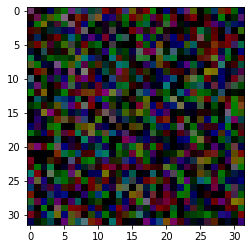

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

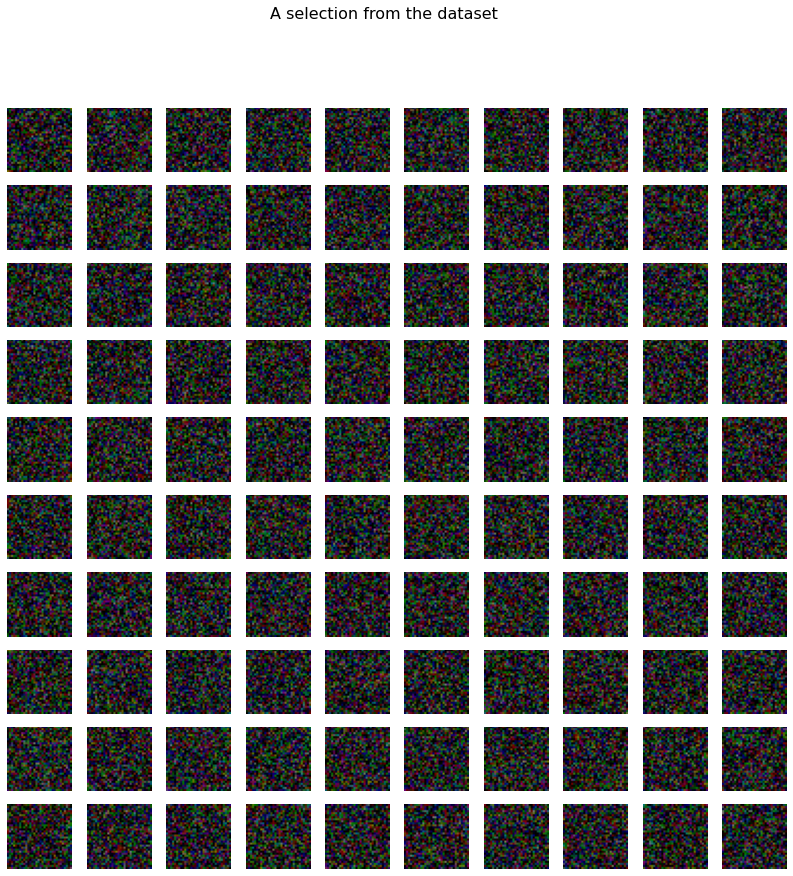

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 12s 40ms/step - loss: 1.9488 - accuracy: 0.1429
test loss, test acc: [1.9487653970718384, 0.1428857147693634]
Evaluate on test data
14/14 [==============================] - 1s 101ms/step - loss: 1.9488 - accuracy: 0.1430
test loss, test acc: [1.948798418045044, 0.14300000667572021]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 15s 36ms/step - loss: 1.9472 - accuracy: 0.1403 - val_loss: 1.9460 - val_accuracy: 0.1447
Epoch 2/250
350/350 [==============================] - 12s 33ms/step - loss: 1.9462 - accuracy: 0.1423 - val_loss: 1.9460 - val_accuracy: 0.1443
Epoch 3/250
350/350 [==============================] - 12s 35ms/step - loss: 1.9459 - accuracy: 0.1462 - val_loss: 1.9461 - val_accuracy: 0.1436
Epoch 4/250
350/350 [==============================] - 12s 35ms/step - loss: 1.9456 - accuracy: 0.1490 - val_loss: 1.9463 - val_accuracy: 0.1429
Epoch 5/250
350/350 [==============================] - 12s 33ms/step - loss: 1.9454 - accuracy: 0.1505 - val_loss: 1.9463 - val_accuracy: 0.1473
Epoch 6/250
350/350 [==============================] - 12s 33ms/step - loss: 1.9452 - accuracy: 0.1514 - val_loss: 1.9462 - val_accuracy: 0.1441
Epoch 7/250
350/350 [==============================] - 12s 33ms/step - loss: 1.9449 - accuracy: 0.1526 - val_loss: 1.9460 - val_ac

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 2s 32ms/step - loss: 0.0107 - accuracy: 0.9961
test loss, test acc: [0.010670531541109085, 0.9960571527481079]
Evaluate on test data
14/14 [==============================] - 0s 33ms/step - loss: 9.2405 - accuracy: 0.1436
test loss, test acc: [9.2405424118042, 0.1435714215040207]


# Small

In [12]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 1s 9ms/step - loss: 22.9262 - accuracy: 0.1424
test loss, test acc: [22.926244735717773, 0.14237143099308014]
Evaluate on test data
14/14 [==============================] - 0s 14ms/step - loss: 23.1021 - accuracy: 0.1429
test loss, test acc: [23.102142333984375, 0.1428571492433548]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 4s 9ms/step - loss: 4.4324 - accuracy: 0.1453 - val_loss: 1.9459 - val_accuracy: 0.1434
Epoch 2/250
350/350 [==============================] - 3s 9ms/step - loss: 1.9585 - accuracy: 0.1429 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/250
350/350 [==============================] - 3s 9ms/step - loss: 1.9520 - accuracy: 0.1406 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/250
350/350 [==============================] - 3s 9ms/step - loss: 1.9505 - accuracy: 0.1409 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/250
350/350 [==============================] - 3s 9ms/step - loss: 1.9495 - accuracy: 0.1403 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 6/250
350/350 [==============================] - 3s 9ms/step - loss: 1.9487 - accuracy: 0.1407 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 7/250
350/350 [==============================] - 3s 9ms/step - loss: 1.9494 - accuracy: 0.1432 - val_loss: 1.9459 - val_accuracy: 0.1429

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 1s 8ms/step - loss: 1.5343 - accuracy: 0.5903
test loss, test acc: [1.5343483686447144, 0.5903428792953491]
Evaluate on test data
14/14 [==============================] - 0s 7ms/step - loss: 2.0053 - accuracy: 0.1480
test loss, test acc: [2.0053417682647705, 0.14800000190734863]


#tNet

In [16]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 4s 46ms/step - loss: 2.5586 - accuracy: 0.1461
test loss, test acc: [2.558622121810913, 0.1460857093334198]
Evaluate on test data
14/14 [==============================] - 1s 78ms/step - loss: 2.5669 - accuracy: 0.1433
test loss, test acc: [2.5668628215789795, 0.14328572154045105]


In [18]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 18s 44ms/step - loss: 2.1923 - accuracy: 0.1433 - val_loss: 2.0478 - val_accuracy: 0.1404
Epoch 2/250
350/350 [==============================] - 15s 43ms/step - loss: 1.8989 - accuracy: 0.2225 - val_loss: 2.0169 - val_accuracy: 0.1411
Epoch 3/250
350/350 [==============================] - 15s 42ms/step - loss: 1.7024 - accuracy: 0.3495 - val_loss: 2.0621 - val_accuracy: 0.1447
Epoch 4/250
350/350 [==============================] - 15s 42ms/step - loss: 1.4913 - accuracy: 0.4584 - val_loss: 2.1677 - val_accuracy: 0.1439
Epoch 5/250
350/350 [==============================] - 15s 42ms/step - loss: 1.2711 - accuracy: 0.5521 - val_loss: 2.3119 - val_accuracy: 0.1477
Epoch 6/250
350/350 [==============================] - 15s 43ms/step - loss: 1.0416 - accuracy: 0.6465 - val_loss: 2.4957 - val_accuracy: 0.1461
Epoch 7/250
350/350 [==============================] - 15s 43ms/step - loss: 0.8323 - accuracy: 0.7239 - val_loss: 2.7128 - val_ac

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 3s 43ms/step - loss: 0.0099 - accuracy: 0.9989
test loss, test acc: [0.00987599603831768, 0.9989143013954163]
Evaluate on test data
14/14 [==============================] - 1s 42ms/step - loss: 6.5834 - accuracy: 0.1434
test loss, test acc: [6.583395004272461, 0.14342856407165527]


# ConvNet

In [20]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 7s 63ms/step - loss: 3.4160 - accuracy: 0.1429
test loss, test acc: [3.4159772396087646, 0.1429428607225418]
Evaluate on test data
14/14 [==============================] - 2s 160ms/step - loss: 3.4140 - accuracy: 0.1431
test loss, test acc: [3.4140138626098633, 0.14314286410808563]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
350/350 [==============================] - 17s 43ms/step - loss: 1.9567 - accuracy: 0.1425 - val_loss: 1.9461 - val_accuracy: 0.1424
Epoch 2/250
350/350 [==============================] - 15s 42ms/step - loss: 1.9461 - accuracy: 0.1416 - val_loss: 1.9460 - val_accuracy: 0.1419
Epoch 3/250
350/350 [==============================] - 15s 42ms/step - loss: 1.9461 - accuracy: 0.1391 - val_loss: 1.9460 - val_accuracy: 0.1427
Epoch 4/250
350/350 [==============================] - 15s 42ms/step - loss: 1.9460 - accuracy: 0.1403 - val_loss: 1.9459 - val_accuracy: 0.1426
Epoch 5/250
350/350 [==============================] - 15s 42ms/step - loss: 1.9460 - accuracy: 0.1416 - val_loss: 1.9460 - val_accuracy: 0.1430
Epoch 6/250
350/350 [==============================] - 15s 42ms/step - loss: 1.9459 - accuracy: 0.1389 - val_loss: 1.9459 - val_accuracy: 0.1430
Epoch 7/250
350/350 [==============================] - 15s 42ms/step - loss: 1.9460 - accuracy: 0.1392 - val_loss: 1.9460 - val_ac

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
69/69 [==============================] - 4s 52ms/step - loss: 1.9459 - accuracy: 0.1429
test loss, test acc: [1.945911169052124, 0.1428571492433548]
Evaluate on test data
14/14 [==============================] - 1s 52ms/step - loss: 1.9459 - accuracy: 0.1429
test loss, test acc: [1.9459185600280762, 0.1428571492433548]


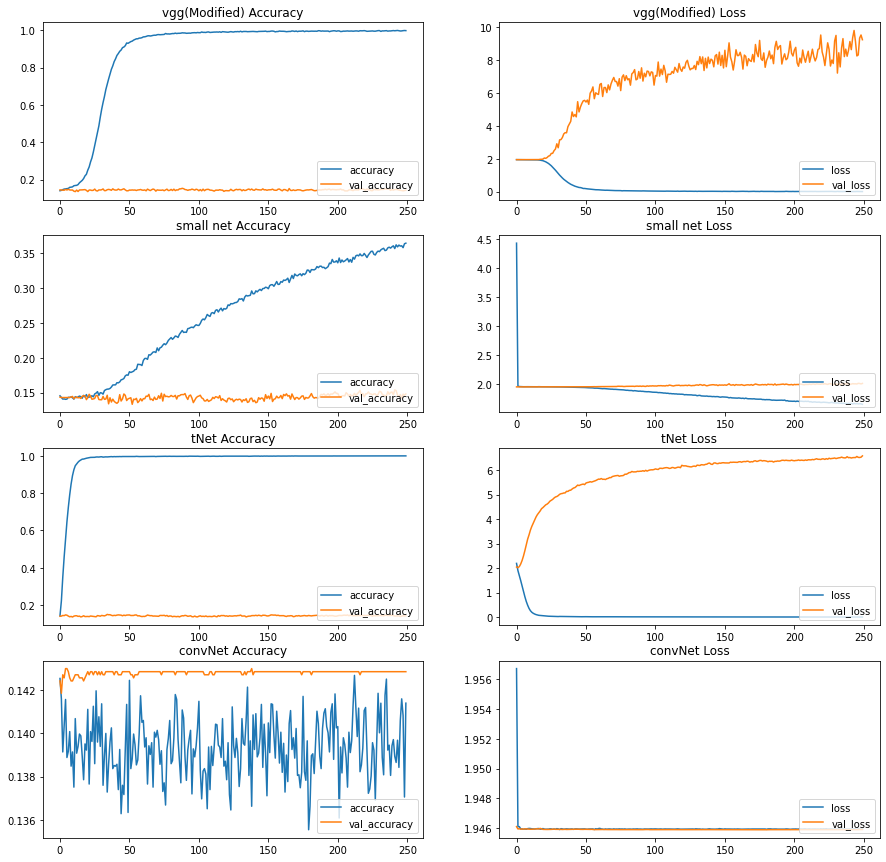

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
